eps: 0.10, min_samples: 3 -> Number of clusters: 13
eps: 0.10, min_samples: 4 -> Number of clusters: 3
eps: 0.10, min_samples: 5 -> Number of clusters: 1
eps: 0.10, min_samples: 6 -> Number of clusters: 0
eps: 0.10, min_samples: 7 -> Number of clusters: 0
eps: 0.10, min_samples: 8 -> Number of clusters: 0
eps: 0.10, min_samples: 9 -> Number of clusters: 0
eps: 0.26, min_samples: 3 -> Number of clusters: 14
eps: 0.26, min_samples: 4 -> Number of clusters: 13
eps: 0.26, min_samples: 5 -> Number of clusters: 8
eps: 0.26, min_samples: 6 -> Number of clusters: 7
eps: 0.26, min_samples: 7 -> Number of clusters: 8
eps: 0.26, min_samples: 8 -> Number of clusters: 7
eps: 0.26, min_samples: 9 -> Number of clusters: 4
eps: 0.41, min_samples: 3 -> Number of clusters: 4
eps: 0.41, min_samples: 4 -> Number of clusters: 5
eps: 0.41, min_samples: 5 -> Number of clusters: 5
eps: 0.41, min_samples: 6 -> Number of clusters: 5
eps: 0.41, min_samples: 7 -> Number of clusters: 4
eps: 0.41, min_samples: 8 ->

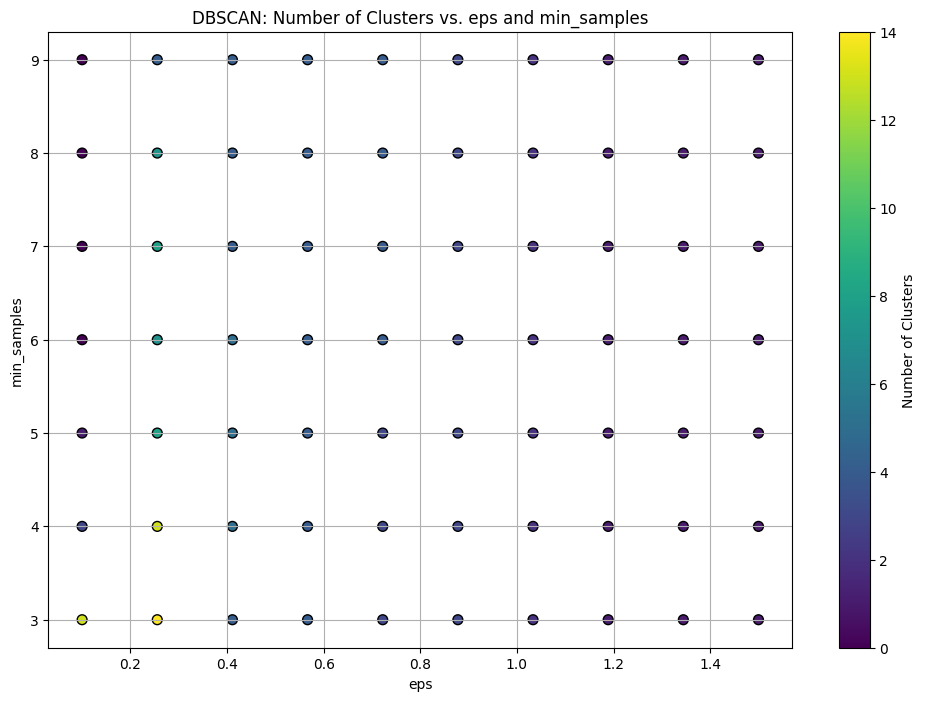

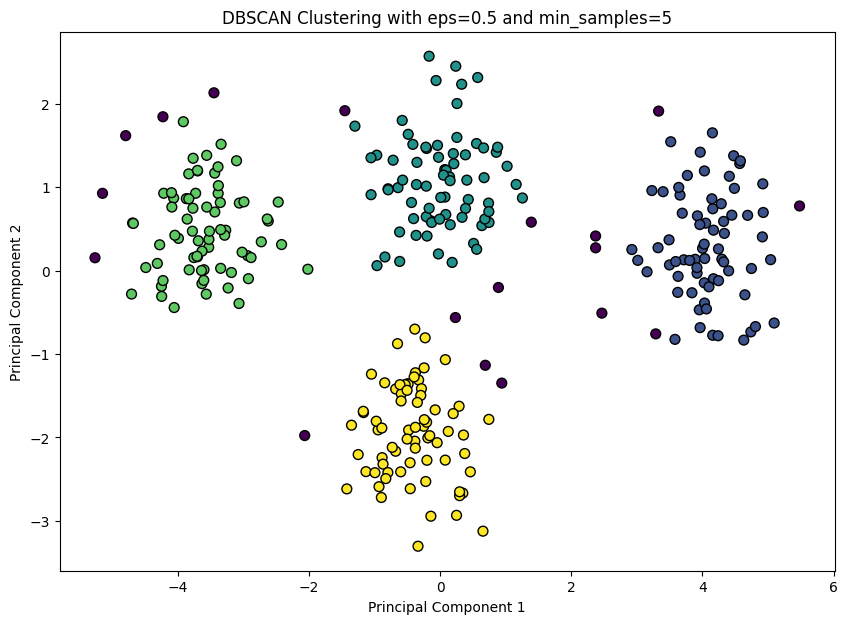

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Example dataset creation
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Define a range of eps and min_samples values to test
eps_values = np.linspace(0.1, 1.5, 10)
min_samples_values = range(3, 10)

# Initialize lists to store results
eps_list = []
min_samples_list = []
num_clusters_list = []

# Perform DBSCAN for each combination of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Number of clusters found (excluding noise)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        eps_list.append(eps)
        min_samples_list.append(min_samples)
        num_clusters_list.append(num_clusters)
        
        # Optional: Print or store the number of clusters for each eps and min_samples
        print(f'eps: {eps:.2f}, min_samples: {min_samples} -> Number of clusters: {num_clusters}')

# Plotting the number of clusters for each combination of eps and min_samples
plt.figure(figsize=(12, 8))
plt.scatter(eps_list, min_samples_list, c=num_clusters_list, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(label='Number of Clusters')
plt.title('DBSCAN: Number of Clusters vs. eps and min_samples')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.grid(True)
plt.show()

# Use a specific combination of eps and min_samples (for example, eps=0.5 and min_samples=5)
best_eps = 0.5
best_min_samples = 5
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(X)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={best_eps} and min_samples={best_min_samples}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
